In [1]:
import pandas as pd
new_df = pd.read_csv('new_df.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df3 = new_df

Figure(1000x400)


<Axes: xlabel='Production'>

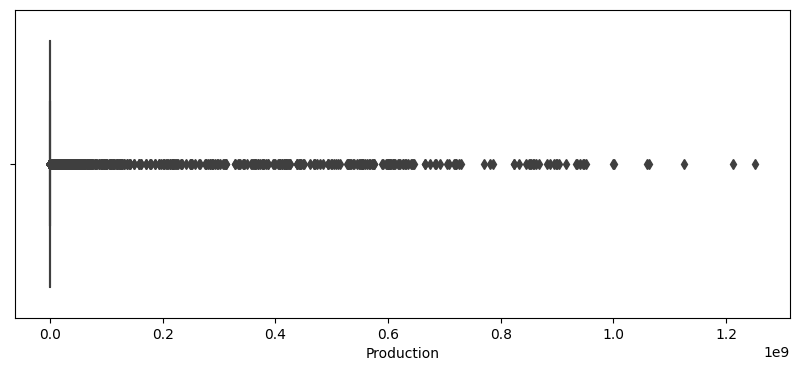

In [5]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Production", data = df3)

In [6]:
new_df3 = df3[df3['State_Name'] == 'Maharashtra']

Figure(1000x400)


<Axes: xlabel='Area'>

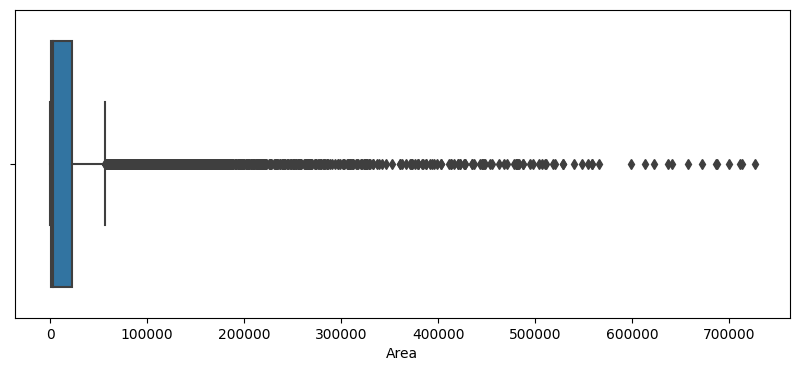

In [8]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Area", data = new_df3)

In [42]:
new_df4 = new_df3[(new_df3['Area'] >= 40000) & (new_df3['Area'] <= 250000)]


Figure(1000x400)


<Axes: xlabel='Area'>

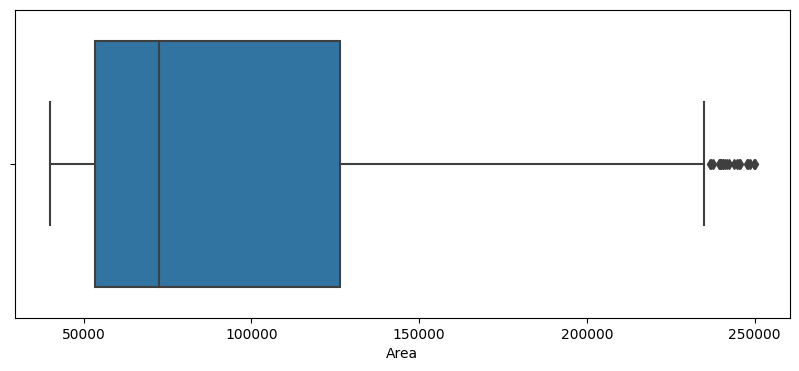

In [43]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Area", data = new_df4)

In [45]:
percentile25 = new_df4['Area'].quantile(0.25)
percentile75 = new_df4['Area'].quantile(0.75)
iqr = percentile75 - percentile25

In [46]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [47]:
# finding outliers using iqr
new_df4[new_df4['Area'] > upper_limit]
new_df4[new_df4['Area'] < lower_limit]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [48]:
# trimming outliers
new_df5 = new_df4[new_df4['Area'] < upper_limit]
new_df5.shape

(1957, 7)

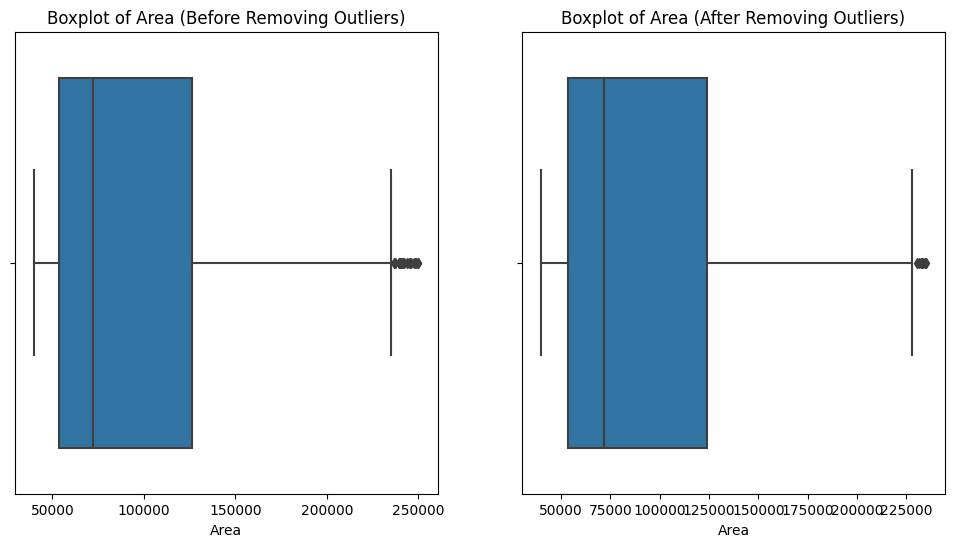

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_df4['Area'])
plt.title('Boxplot of Area (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=new_df5['Area'])
plt.title('Boxplot of Area (After Removing Outliers)')

plt.show()

In [57]:
# finding boundary values for area using z-score
print("Highest allowed:-",new_df5['Area'].mean() + 3*new_df5['Area'].std())
print("Lowest allowed:",new_df5['Area'].mean() - 3*new_df5['Area'].std())

Highest allowed:- 236501.0269986406
Lowest allowed: -54037.20584381177


In [60]:
# finding outliers for Area
new_df5[(new_df5['Area'] > 236501.02) | (new_df5['Area'] < 54037.20)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
124806,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
124813,Maharashtra,AHMEDNAGAR,1997,Kharif,Sugarcane,45900.0,38940.0
124947,Maharashtra,AHMEDNAGAR,2001,Whole Year,Sugarcane,52000.0,3596300.0
124978,Maharashtra,AHMEDNAGAR,2002,Whole Year,Sugarcane,49400.0,3303000.0
124996,Maharashtra,AHMEDNAGAR,2003,Rabi,Gram,50900.0,20500.0
...,...,...,...,...,...,...,...
137375,Maharashtra,YAVATMAL,2011,Rabi,Gram,40600.0,52400.0
137391,Maharashtra,YAVATMAL,2012,Rabi,Gram,45600.0,54100.0
137400,Maharashtra,YAVATMAL,2013,Kharif,Jowar,48300.0,15600.0
137406,Maharashtra,YAVATMAL,2013,Rabi,Gram,45600.0,37100.0


In [62]:
df6 = new_df5[(new_df5['Area'] < 48.95) & (new_df5['Area'] > 12.368)]
df6

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


AttributeError: module 'seaborn' has no attribute 'histplot'

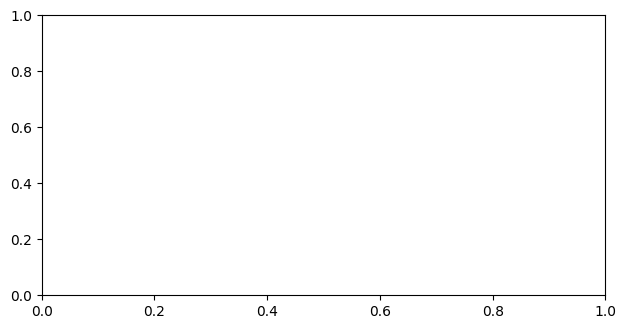

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Plot distribution and boxplot of 'Area' before trimming outliers
plt.subplot(2, 2, 1)
sns.histplot(new_df4['Area'], kde=True)
plt.title('Distribution of Area (Before Trimming)')
plt.xlabel('Area')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.boxplot(new_df4['Area'])
plt.title('Boxplot of Area (Before Trimming)')
plt.xlabel('Area')

# Plot distribution and boxplot of 'Area' after trimming outliers
plt.subplot(2, 2, 3)
sns.histplot(new_df5['Area'], kde=True)
plt.title('Distribution of Area (After Trimming)')
plt.xlabel('Area')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.boxplot(new_df5['Area'])
plt.title('Boxplot of Area (After Trimming)')
plt.xlabel('Area')

plt.tight_layout()
plt.show()


In [74]:
new_df5.to_csv('new_df5.csv', index=False)